In [37]:
import sys
from glob import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import skimage
import skimage.io as io

from skimage.morphology import disk
from skimage.feature import blob_log
from skimage.filters import gaussian


sys.path.append('../../src')
import viz
import log_blobs_detector 
import traj_descriptors as td


import warnings
warnings.filterwarnings('ignore')

## File Log

In [38]:
file_LOG="../../results/Analysized_experiments.csv"
file_Log=pd.read_csv(file_LOG,sep=";")
file_Log["omeroID"]=file_Log["omeroID"].astype('str')
file_Log=file_Log.set_index("omeroID")
file_Log

file_prefix  duration_frames  \
omeroID                                                                       
nan                                 2021May19_8ml_kb_wt-01             41.0   
nan                          2021May3_8ml_kb_RedGlyc_ON-02             21.0   
nan                         2021May6_8ml_kb_RedGlyc_day-01             33.0   
nan                          2021Apr21_8ml_kb_wtglyc_ON-02             48.0   
nan                          2021May18_8ml_kb_Dwss-01MOVIE             41.0   
nan                                 2021May24_8ml_kb_wt-01             43.0   
nan                                                    NaN              NaN   
43113.0  2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_W...            138.0   
43116.0  2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_W...             37.0   
43117.0  2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_W...             35.0   
43118.0  2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_W...            128.0   
43047.0  2021Feb15_6wellplate_lid_8ml_kb_aliquot_glyc_W...             49.0   

         dx_micron  dy_micron    dt_s  Nrows_px  Ncols_px  
omeroID                                                    
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan         12.971     12.971  1200.0    2208.0    2752.0  
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan         12.971     12.971  1800.0    2208.0    2752.0  
nan            NaN        NaN     NaN       NaN       NaN  
43113.0     12.971     12.971   300.0    2208.0    2752.0  
43116.0     12.971     12.971  1200.0    2208.0    2752.0  
43117.0     12.971     12.971  1200.0    2208.0    2752.0  
43118.0     12.971     12.971   300.0    2208.0    2752.0  
43047.0     12.971     12.971   300.0    2208.0    2752.0

In [39]:
file_Log["file_prefix"]

omeroID
nan                                   2021May19_8ml_kb_wt-01
nan                            2021May3_8ml_kb_RedGlyc_ON-02
nan                           2021May6_8ml_kb_RedGlyc_day-01
nan                            2021Apr21_8ml_kb_wtglyc_ON-02
nan                            2021May18_8ml_kb_Dwss-01MOVIE
nan                                   2021May24_8ml_kb_wt-01
nan                                                      NaN
43113.0    2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_W...
43116.0    2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_W...
43117.0    2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_W...
43118.0    2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_W...
43047.0    2021Feb15_6wellplate_lid_8ml_kb_aliquot_glyc_W...
Name: file_prefix, dtype: object

## Load Cell count

In [42]:
Cels_per_ml=pd.DataFrame()
time_hours_cells_5May=[12,13,14,15,16,18]
cells_5May=[13200,44000,24200,70000,182800,418600]
df_5May=pd.DataFrame({'time_hour':time_hours_cells_5May,'cells_count':cells_5May})
df_5May['experiment']='2021May5'
Cels_per_ml=pd.concat([Cels_per_ml,df_5May])


time_hours_cells_4May=[12,13,14,15,16,17]
cells_4May=[6800,7000,19400,50400,129600,143000]
df_4May=pd.DataFrame({'time_hour':time_hours_cells_4May,'cells_count':cells_4May})
df_4May['experiment']='2021May3_8ml_kb_RedGlyc_ON-02'
Cels_per_ml=pd.concat([Cels_per_ml,df_4May])


time_hours_cells_7May=[13,14,15,16,17,18]
cells_7May=[8000,28000,40000,186000,296000,600000]
df_7May=pd.DataFrame({'time_hour':time_hours_cells_7May,'cells_count':cells_7May})

df_7May['experiment']='2021May6_8ml_kb_RedGlyc_day-01'
Cels_per_ml=pd.concat([Cels_per_ml,df_7May])


Cels_per_ml["time_min"]=Cels_per_ml["time_hour"]*60


## Read Detected_blobs 

In [5]:
FileList=glob('../../results/Detected_blobs_*.csv')
FileList

['../../results/Detected_blobs_2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_WT-04.czi.csv',
 '../../results/Detected_blobs_2021Apr21_8ml_kb_wtglyc_ON-02.csv',
 '../../results/Detected_blobs_2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_WT-01_overnight.czi".csv',
 '../../results/Detected_blobs_2021May3_8ml_kb_RedGlyc_ON-02.csv',
 '../../results/Detected_blobs_2021Feb16_6wellplate_lid_8ml_kb_aliquot_glyc_WT-01.czi.csv',
 '../../results/Detected_blobs_2021May24_8ml_kb_wt-01.csv',
 '../../results/Detected_blobs_2021May19_8ml_kb_wt-01.csv',
 '../../results/Detected_blobs_2021May18_8ml_kb_Dwss-01MOVIE.csv',
 '../../results/Detected_blobs_2021Feb15_6wellplate_lid_8ml_kb_aliquot_glyc_WT-02.czi.csv',
 '../../results/Detected_blobs_2021Feb17_6wellplate_lid_8ml_kb_aliquot_glyc_WT-03_overnight.czi.csv',
 '../../results/Detected_blobs_2021May6_8ml_kb_RedGlyc_day-01.csv']

## Bobs analysis

In [6]:
Blobs_all_experiments=pd.DataFrame()

for file in FileList:
    df=pd.read_csv(file)
    Blobs_all_experiments=pd.concat([Blobs_all_experiments,df])

# contrast filter    
Blobs_all_experiments= Blobs_all_experiments[Blobs_all_experiments["contrast"]>0.06]


def blobs_counter(df):
    Count=df.groupby(['time_min']).apply(lambda x: len(x['radius']))
    A=Count.reset_index('time_min')
    A=A.rename(columns={A.columns[1]:"Count"})
    A['Count_correct']=A['Count']-A['Count'].iloc[0]
    return A


df_Counter=pd.DataFrame()
for id, group in  Blobs_all_experiments.groupby("file_prefix"):
    df_counter=blobs_counter(group)
    df_counter["file_prefix"]=id
    #df_counter['time']=df_counter['frame']*dt
    df_Counter=pd.concat([df_Counter,df_counter])

## Select May experiment

In [7]:
ListFiles=["2021May19_8ml_kb_wt-01","2021May3_8ml_kb_RedGlyc_ON-02","2021May6_8ml_kb_RedGlyc_day-01","2021May18_8ml_kb_Dwss-01MOVIE","2021May24_8ml_kb_wt-01"]
ListFiles
df_Counter=df_Counter.loc[df_Counter['file_prefix'].isin(ListFiles)]

## Time shift


In [8]:
def time_shift(df,experiment_name,time_shift_min):
    selection=df['file_prefix']==experiment_name
    df.loc[selection,'time_min']=df_Counter.loc[selection,'time_min']+time_shift_min
    return df

* 2021May3 10 hours

In [9]:
df_Counter=time_shift(df_Counter,'2021May3_8ml_kb_RedGlyc_ON-02',10*60)

* 2021May6 10 hours

In [10]:
df_Counter=time_shift(df_Counter,'2021May6_8ml_kb_RedGlyc_day-01',10*60)

## Cut off declined part

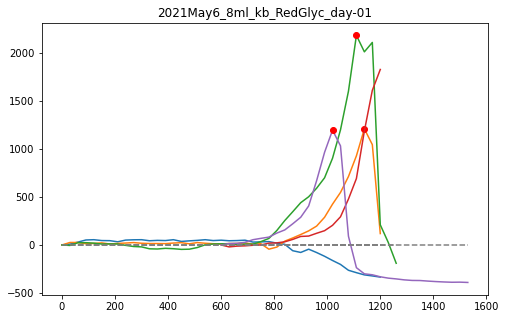

In [11]:
from scipy.signal import find_peaks

df_peaks=[]
df_Counter_incr_part=pd.DataFrame()
fig,ax=plt.subplots(figsize=(8,5))
for id, group in  df_Counter.groupby("file_prefix"):
    x=group['Count_correct'].values
    t=group['time_min'].values
    
    peaks, _ = find_peaks(x, height=1000,width=3)
    
    ax.plot(t,x)
    ax.plot(t[peaks], x[peaks],"or")
    ax.plot(t,np.zeros_like(x), "--", color="gray")
    ax.set_title(id)
    
    if peaks:
        peak=peaks[0]
        file_peaks={"file_prefix":id,"peak_t_min":t[peak],"peak_number_colonies":x[peak]}
        df_peaks.append(file_peaks)
        df_new=group[group['time_min']<t[peak]]
    else:
        df_new=group
    
    group['file_prefix']=id
    df_Counter_incr_part=pd.concat([df_Counter_incr_part,df_new])
    
    
df_peaks=pd.DataFrame(df_peaks)

In [12]:
df_Counter_incr_part["file_prefix"].unique()

array(['2021May18_8ml_kb_Dwss-01MOVIE', '2021May19_8ml_kb_wt-01',
       '2021May24_8ml_kb_wt-01', '2021May3_8ml_kb_RedGlyc_ON-02',
       '2021May6_8ml_kb_RedGlyc_day-01'], dtype=object)

## Plot a graph

set the colors

In [14]:
dict_colors={'2021May19_8ml_kb_wt-01':"#e41a1c",
            '2021May24_8ml_kb_wt-01':"#377eb8",
            '2021May3_8ml_kb_RedGlyc_ON-02':"#4daf4a",
            '2021May6_8ml_kb_RedGlyc_day-01':"#984ea3",
            '2021May5':"#ff7f00",
            '2021May18_8ml_kb_Dwss-01MOVIE':"cyan"
            }

In [15]:
sns.set(font_scale=1.5)
fig,axx=plt.subplots(nrows=2, ncols=1,figsize=(10,15),sharex='col')


######### numbers colonies ##################
df_Counter_incr_part['time_hours']=df_Counter_incr_part['time_min']/60
# set plot propertie
axx[0].set_ylabel("# microcolonies")
axx[0].set_xlim([-1,21])
axx[0].set_title("Number of microcolonies")

for id, group in df_Counter_incr_part.groupby('file_prefix'):
    axx[0].plot(group["time_hours"],group['Count_correct'],'-o',linewidth=2.5,markersize=3,color=dict_colors[id],label=id)
    
axx[0].legend(loc='upper left')

# #axx.set_xlim([13.0,24.0])

# box = g.get_position()
# g.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
# # Put a legend to the right side
# g.legend(loc='lower left', bbox_to_anchor=(1, 0.65), ncol=1)

######### cell counter graph ###########
for id, group in Cels_per_ml.groupby('experiment'):
    axx[1].plot(group["time_hour"],group['cells_count'],'-o',linewidth=2.5,markersize=3,color=dict_colors[id],label=id)
    
axx[1].legend(loc='upper left')    
axx[1].set_xlim([-1,21])
axx[1].set_xlabel('time hours')
axx[1].set_ylabel("cell counts per ml")
axx[1].set_title("Cell counts per ml")
axx[1].ticklabel_format(axis="y", style="sci",scilimits=(0,0))





plt.savefig("../../results/Number_Colonies.png", bbox_inches="tight")

## Alinged plots

In [16]:
def pad_data_frame(df,n):
    df_pad=pd.DataFrame({'Count_correct':np.zeros(n),'time_min':np.zeros(n)})
    df_new=pd.concat([df,df_pad])
    df_new=df_new.reset_index()
    return df_new
  
    
def calculated_shift(dD_lines,file_fixed,file_find):
    
    # calculate optimal time shift to adjust plots
    from sklearn.metrics import mean_squared_error
    
    # select fixed file
    dt_fixed=file_Log[file_Log['file_prefix']==file_fixed]["dt_s"].values[0]
    df_fixed=dD_lines.loc[dD_lines['file_prefix']==file_fixed,['time_min','Count_correct']]
    df_fixed["time_alinged_min"]=range(0,df_fixed.shape[0])*dt_fixed/60
    max_time=df_fixed["time_alinged_min"].max()
    
    # select adjusted file
    dt_find=file_Log[file_Log['file_prefix']==file_find]["dt_s"].values[0]
    df_find=dD_lines.loc[dD_lines['file_prefix']==file_find,['time_min','Count_correct']]

    # pad data frame
    df_find=pad_data_frame(df_find,35)

    mse_all=[]
    for d_shift in range(-40,40):
        df_find_temp=df_find.shift(d_shift,fill_value=0)
        mse=np.sum((df_find_temp-df_fixed)['Count_correct']**2)
        mse_dict={"shift":d_shift,"mse":mse}
        mse_all.append(mse_dict)

    mse_all=pd.DataFrame(mse_all)
    calculated_shift=int(mse_all.iloc[np.argmin(mse_all["mse"].values)]['shift'])
    
    df_find_temp=df_find.shift(calculated_shift,fill_value=0)
    df_find_temp["time_alinged_min"]=range(0,df_find_temp.shape[0])*dt_find/60
    df_find_temp=df_find_temp[df_find_temp["time_alinged_min"]<=max_time]
    
    fig,ax=plt.subplots(figsize=(8,8))
    ax.set_title(file_find)
    ax.plot(df_fixed['Count_correct'],'-o',label='fixed')
    ax.plot(df_find['Count_correct'],'green',label='original position')
    ax.plot(df_find_temp['Count_correct'],'-o',label='adjusted')
    plt.legend()
    plt.show()
    
    
    return df_find_temp

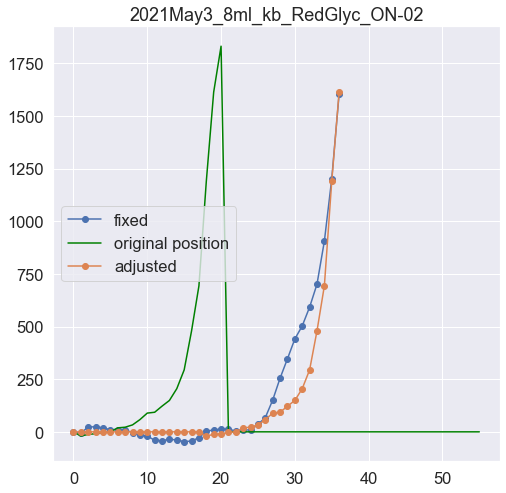

In [17]:
# init file name that other files will be alinged to
file_fixed="2021May24_8ml_kb_wt-01"
df_alinged=df_Counter_incr_part.loc[df_Counter_incr_part['file_prefix']==file_fixed,['file_prefix','time_min','Count_correct']]
dt=file_Log[file_Log['file_prefix']==file_fixed]["dt_s"].values[0]
df_alinged["time_alinged_min"]=range(0,df_alinged.shape[0])*dt/60


for id,group in df_Counter_incr_part.groupby('file_prefix'):
    if (id!=file_fixed)&(id!='2021May18_8ml_kb_Dwss-01MOVIE'):
        df_find_temp=calculated_shift(df_Counter_incr_part,file_fixed,id)
        df_find_temp['file_prefix']=id
        df_alinged=pd.concat([df_alinged,df_find_temp])
        #ax.plot(df_adjusted['Count_correct'],label=file_find)

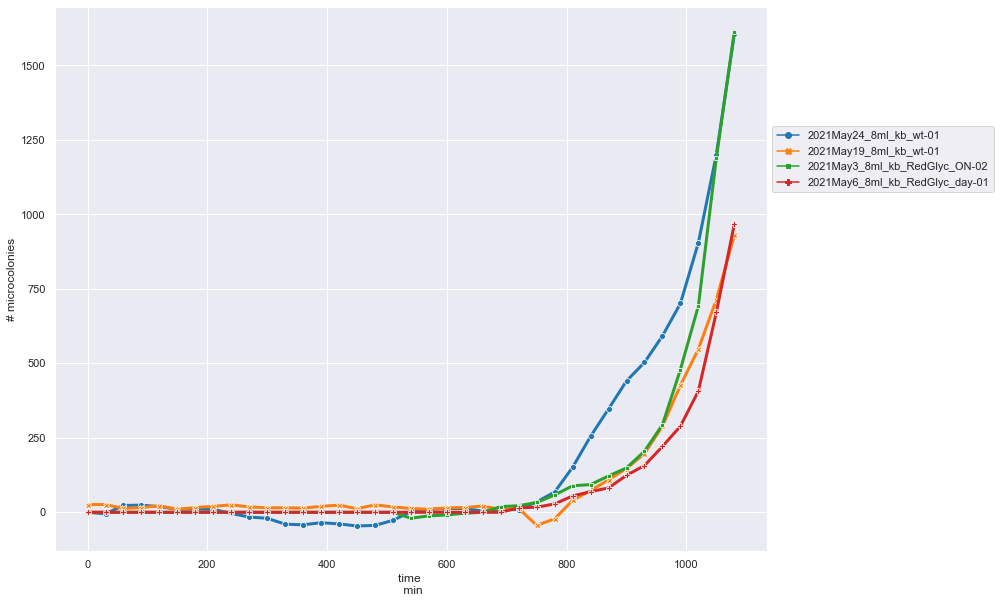

In [21]:
sns.set(font_scale=1)
fig,axx=plt.subplots(nrows=1, ncols=1,figsize=(15,10))

g=sns.lineplot(data=df_alinged,x="time_alinged_min",y='Count_correct',hue='file_prefix',style="file_prefix",palette="tab10", linewidth = 3,markers=True, dashes=False,ax=axx)
axx.set_ylabel("# microcolonies")
axx.set_xlabel("time \n min")
#axx.set_xlim([13.0,24.0])

box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position
# Put a legend to the right side
g.legend(loc='lower left', bbox_to_anchor=(1, 0.65), ncol=1)


#axx.set_xlim([0,420]);
#plt.savefig("../../results/Number_Colonies.png", bbox_inches="tight")

## Linear regression

select time less than 300 minutes in alinged data frame

In [22]:
df_alinged_filtered=df_alinged[df_alinged['time_alinged_min']>=720]

In [23]:
from sklearn import linear_model
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


def linear_regression(time,prop):
    """
    Linear regression time vs properties
    (could be area,orientation,compactness)
    
    """
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error, r2_score
    
    # reshape required for LinearRegression
    time=time.reshape(-1, 1)
    
    # Create linear regression object
    regr = linear_model.LinearRegression(fit_intercept=True)
    regr.fit(time, prop)
    
    # Make predictions using the testing set
    prop_predict = regr.predict(time)
    
    
    #     # The coefficients
    #     print('Coefficients: \n', regr.coef_)
    #     # The mean squared error
    #     print('Mean squared error: %.2f'% mean_squared_error(area, area_predict))
    #     # The coefficient of determination: 1 is perfect prediction
    #     print('Coefficient of determination: %.2f'% r2_score(area,area_predict))

    # Plot outputs
    result={"slope":regr.coef_[0], 
                   "intersept":regr.intercept_,
                   "MAE":mean_absolute_error(prop,prop_predict),
                   "R2":r2_score(prop,prop_predict)}
    
    return result,prop_predict

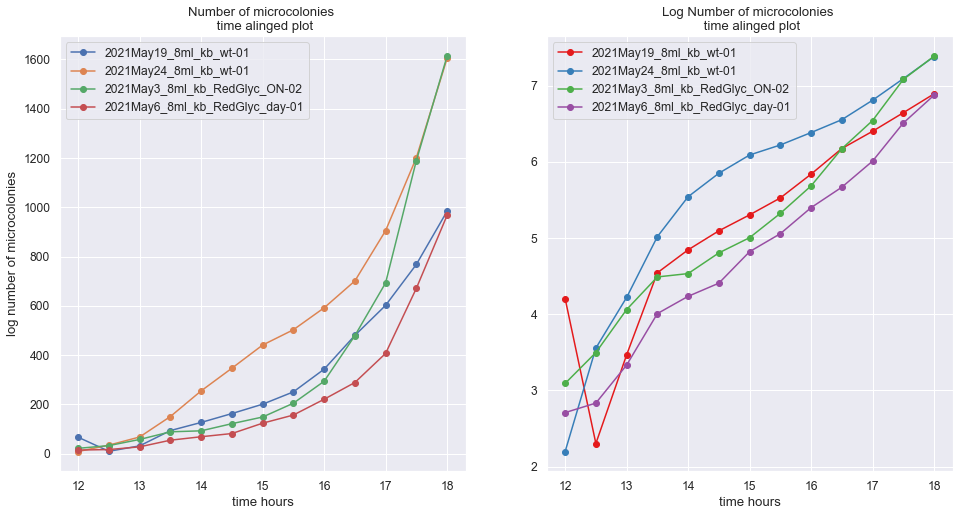

In [54]:
df_peaks=[]
result_fit=[]
sns.set(font_scale=1.1)
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
for id, group in  df_alinged_filtered.groupby("file_prefix"):
    x=group['Count_correct'].values
    
    if x.min()<=0:
        x=x+np.abs(x.min())+10
    
        
    t=group['time_alinged_min'].values
    result,predict=linear_regression(t,np.log(x+1e-6))
    result["experiment"]=id
    result["color"]=dict_colors[id]
          
    result_fit.append(result)
    ax[0].plot(t/60,x,'-o',label=id)
    ax[0].legend()
    ax[0].set_title("Number of microcolonies \n time alinged plot")
    ax[0].set_xlabel("time hours")
    ax[0].set_ylabel("number of microcolonies")
    
    ax[1].plot(t/60,np.log(x+1e-6),'-o',color=dict_colors[id],label=id)
    ax[1].set_title("Log Number of microcolonies \n time alinged plot")
    ax[1].set_xlabel("time hours")
    ax[0].set_ylabel("log number of microcolonies")
    ax[1].legend()
    

    
plt.savefig("../../results/Number_Colonies_fit.png", bbox_inches="tight")

In [56]:
result_fit_microcolonies=pd.DataFrame(result_fit)
result_fit_microcolonies['doubling_time_min']=np.log2(2)/result_fit_microcolonies.slope
result_fit_microcolonies['intersept_exp']=np.exp(result_fit_microcolonies['intersept'])
result_fit_microcolonies

slope  intersept       MAE        R2                      experiment  \
0  0.010417  -4.203607  0.312124  0.854100          2021May19_8ml_kb_wt-01   
1  0.012050  -5.236640  0.399165  0.878689          2021May24_8ml_kb_wt-01   
2  0.011261  -4.929720  0.130529  0.984289   2021May3_8ml_kb_RedGlyc_ON-02   
3  0.011362  -5.467678  0.093745  0.991010  2021May6_8ml_kb_RedGlyc_day-01   

     color  doubling_time_min  intersept_exp  
0  #e41a1c          95.998360       0.014942  
1  #377eb8          82.989898       0.005318  
2  #4daf4a          88.804829       0.007229  
3  #984ea3          88.013380       0.004221

In [29]:
result_fit[['experiment','doubling_time_min','R2']].to_csv("../../results/Doubling_time_microcolonies.csv")

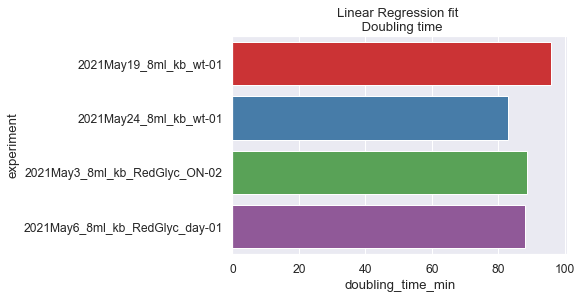

In [276]:
fig,axx=plt.subplots(nrows=1,ncols=1)
sns.barplot(y="experiment", x="doubling_time_min", data=result_fit,palette=result_fit["color"],ax=axx)
axx.set_title("Linear Regression fit \n Doubling time")
plt.savefig("../../results/Number_Colonies_doubling_time.png", bbox_inches="tight")

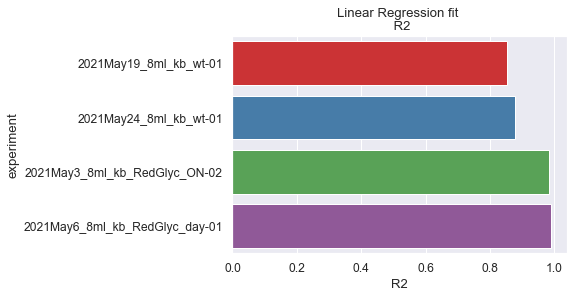

In [277]:
fig,axx=plt.subplots(nrows=1,ncols=1)
sns.barplot(y="experiment", x="R2", data=result_fit,palette=result_fit["color"],ax=axx)
axx.set_title("Linear Regression fit \n R2")
plt.savefig("../../results/Number_Colonies_R2.png", bbox_inches="tight")

## Cell count fit

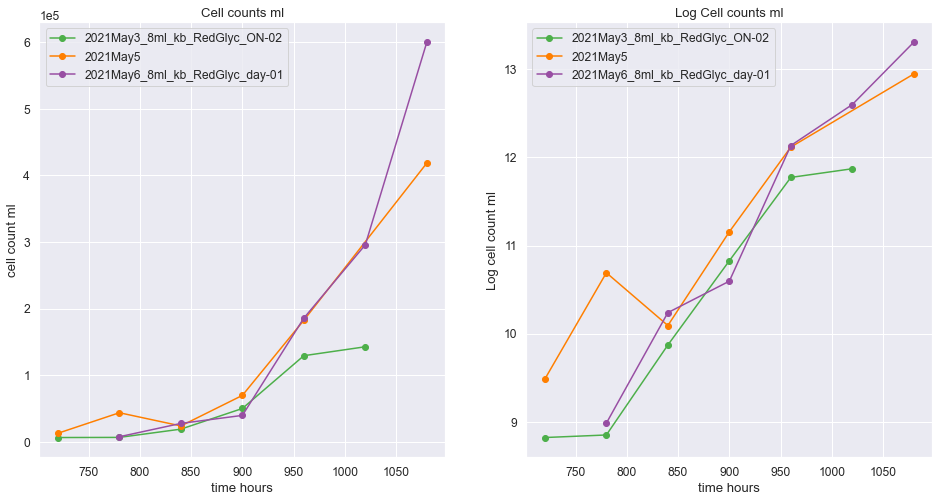

In [47]:
result_fit=[]
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,8))
ax[0].set_title("Cell counts ml")
ax[0].ticklabel_format(axis="y", style="sci",scilimits=(0,0))
ax[1].set_title("Log Cell counts ml")
ax[0].set_xlabel("time hours")
ax[1].set_xlabel("time hours")
ax[0].set_ylabel("cell count ml")
ax[1].set_ylabel("Log cell count ml")
#ax[0].set_ylabel("log number of microcolonies")

for id, group in  Cels_per_ml.groupby("experiment"):
    x=group['cells_count'].values
    t=group['time_min'].values
    result,predict=linear_regression(t,np.log(x+1e-6))
    result["experiment"]=id
    result["color"]=dict_colors[id]
          
    result_fit.append(result)
    ax[0].plot(t,x,'-o',label=id,color=dict_colors[id])
    ax[1].plot(t,np.log(x+1e-6),'-o',label=id,color=dict_colors[id])
    ax[0].legend()
    ax[1].legend()
    
result_fit_cells=pd.DataFrame(result_fit)
result_fit_cells['doubling_time_min']=np.log2(2)/result_fit_cells.slope
result_fit_cells['intersept_exp']=np.exp(result_fit_cells['intersept'])
plt.savefig("../../results/Cell_count.png", bbox_inches="tight")

In [51]:
result_fit_cells['doubling_time_min']

0     84.202233
1    106.286503
2     69.539250
Name: doubling_time_min, dtype: float64

In [45]:
result_fit_cells[['experiment',"doubling_time_min","R2"]]
result_fit_cells[['experiment',"doubling_time_min","R2"]].to_csv("../../results/Doubling_time_cells.csv")

In [46]:
fig,axx=plt.subplots(nrows=1,ncols=1)
sns.barplot(y="experiment", x="doubling_time_min", data=result_fit_cells,palette=result_fit_cells["color"],ax=axx)
axx.set_title("Linear Regression fit \n Doubling time")
plt.savefig("../../results/Cell_count_doubling_time.png", bbox_inches="tight")

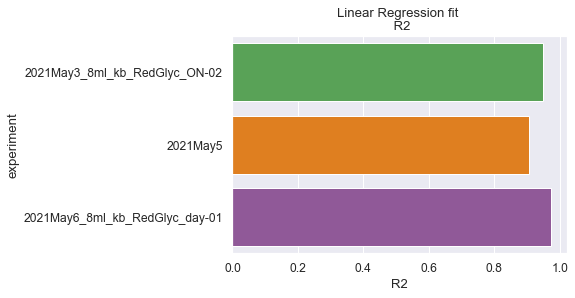

In [284]:
fig,axx=plt.subplots(nrows=1,ncols=1)
sns.barplot(y="experiment", x="R2", data=result_fit_cells,palette=result_fit_cells["color"],ax=axx)
axx.set_title("Linear Regression fit \n R2")
plt.savefig("../../results/Cell_count_R2.png", bbox_inches="tight")

In [52]:
result_fit_cells

slope  intersept       MAE        R2                      experiment  \
0  0.011876   0.004720  0.256651  0.949812   2021May3_8ml_kb_RedGlyc_ON-02   
1  0.009409   2.802341  0.277522  0.905303                        2021May5   
2  0.014380  -2.063727  0.205418  0.974758  2021May6_8ml_kb_RedGlyc_day-01   

     color  doubling_time_min  intersept_exp  
0  #4daf4a          84.202233       1.004731  
1  #ff7f00         106.286503      16.483182  
2  #984ea3          69.539250       0.126980

In [60]:
result_fit_cells["type"]="cells"
result_fit_microcolonies["type"]="aggregates"
results=pd.concat([result_fit_cells,result_fit_microcolonies])

In [70]:
sns.boxplot(x="type", y="doubling_time_min", data=results)
sns.swarmplot(x="type", y="doubling_time_min", data=results,color="black")
plt.xlabel("")
plt.savefig("../../results/Box_plot.png", bbox_inches="tight")

In [71]:
sns.swarmplot(x="type", y="doubling_time_min", data=results,color="black")
plt.xlabel("")
plt.savefig("../../results/Point_plot.png", bbox_inches="tight")